Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


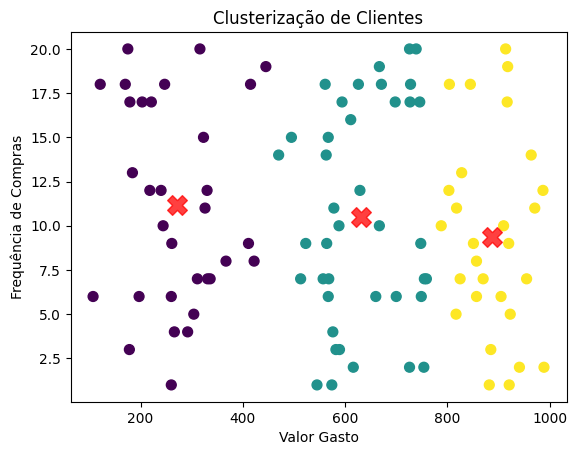

Cluster 0:


,ValorGasto,FrequenciaCompras,Cluster
count,32.000000,32.00000,32.0
mean,270.625000,11.15625,0.0
std,87.316905,5.68024,0.0
min,107.000000,1.00000,0.0
25%,201.500000,6.75000,0.0
50%,260.500000,10.50000,0.0
75%,327.000000,17.00000,0.0
max,445.000000,20.00000,0.0




Cluster 1:


,ValorGasto,FrequenciaCompras,Cluster
count,40.000000,40.000000,40.0
mean,631.900000,10.500000,1.0
std,84.198727,6.089082,0.0
min,470.000000,1.000000,1.0
25%,567.000000,6.000000,1.0
50%,613.500000,9.500000,1.0
75%,726.000000,17.000000,1.0
max,759.000000,20.000000,1.0




Cluster 2:


,ValorGasto,FrequenciaCompras,Cluster
count,28.000000,28.000000,28.0
mean,888.035714,9.392857,2.0
std,58.939066,5.566695,0.0
min,788.000000,1.000000,2.0
25%,840.750000,5.750000,2.0
50%,895.000000,9.000000,2.0
75%,921.500000,12.250000,2.0
max,989.000000,20.000000,2.0


In [3]:
from faker import Faker
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Gerar dados fictícios
fake = Faker()
dados_clientes = []
for _ in range(100):
    dados_clientes.append({
        'Nome': fake.name(),
        'Email': fake.email(),
        'ValorGasto': fake.random_int(min=100, max=1000),
        'FrequenciaCompras': fake.random_int(min=1, max=20)
    })
df = pd.DataFrame(dados_clientes)

# Clusterização
X = df[['ValorGasto', 'FrequenciaCompras']]
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

# Visualização
plt.scatter(df['ValorGasto'], df['FrequenciaCompras'], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Valor Gasto')
plt.ylabel('Frequência de Compras')
plt.title('Clusterização de Clientes')
plt.show()

# Análise dos clusters
for cluster in range(k):
    print(f"Cluster {cluster}:")
    display(df[df['Cluster'] == cluster].describe())
    print("\n")